# INCOME GROUPS PREDICTION MODEL
### INVOKE ANALYTICS RECRUITMENT TEST
**Name: Muhammad Naqib Bin Mat Asri**

##### Objective
<a id = '0'></a>


*  **Data Cleaning & Preparation**
    * [Manage Missing Values](#2.0)
    * [Manage Duplicate Rows](#2.1)
    * [Target Variable Column](#2.2)
    
*  **Exploratory Data Analysis (EDA)**
    * [Quick Check on Overall EDA](#1.0)
    * [EDA on Relationship Between Target Variable and Categorical Variables](#1.1)
    * [EDA on Relationship Between Target Variable and Numerical Variables](#1.2)
    * [Insight](#1.3)
    
*  **Machine Learning Model to Predict Income Group of Individual**
    * [Machine Learning Models](#4.0)
    * [Conclusion - The best ML Model](#4.1)
    
*  **Save & Serialize ML Algorithms**
    * [Save & Serialize ML Algorithms to a File Using Pickle Library](#3.0)
    

# 0. Import necessary Packages

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#  1. Load the Data into Pandas Dataframe

In [27]:
data = pd.read_csv('surveyA.csv')
data.head(10).T

0                         1  \
age                                         30                        43   
race                                      Kree                   Sapiens   
gender                                       M                         M   
employment                            Employed             Self-employed   
education                          High School         Bachelor's Degree   
married                                    Yes                       Yes   
person_living_in_house                       3                         3   
salary                                1K to 2K                  5K to 6K   
house_type                 Rental house - flat  Own house - condominiums   
house_value                         Below 100K              300K to 400K   
vehicle                        Local brand car            Asia brand car   
house_rental_fee                         450.0                       0.0   
house_loan_pmt                             0.0                     950.0   
transport_use                    Own transport             Own transport   
transport_spending                       250.0                     700.0   
public_transport_spending                  0.0                       0.0   
house_utility                            120.0                     350.0   
food_spending                            300.0                    1000.0   
kids_spending                            160.0                     500.0   
personal_loan                              0.0                     300.0   
education_loan                             0.0                       0.0   
other_loan                               200.0                       0.0   
investment                                 0.0                       0.0   

                                           2  \
age                                       28   
race                                  Skrull   
gender                                     F   
employment                          Employed   
education                  Bachelor's Degree   
married                                  Yes   
person_living_in_house                     5   
salary                              2K to 3K   
house_type                    Parent's house   
house_value                              NaN   
vehicle                      Local brand car   
house_rental_fee                         0.0   
house_loan_pmt                           0.0   
transport_use                  Own transport   
transport_spending                     600.0   
public_transport_spending                0.0   
house_utility                          300.0   
food_spending                          600.0   
kids_spending                          100.0   
personal_loan                            0.0   
education_loan                           0.0   
other_loan                               0.0   
investment                               0.0   

                                                            3  \
age                                                        57   
race                                                     Kree   
gender                                                      F   
employment                                      Self-employed   
education                                         High School   
married                                                   Yes   
person_living_in_house                                      4   
salary                                               1K to 2K   
house_type                 Own house - kampung / wooden house   
house_value                                        Below 100K   
vehicle                                            Motorcycle   
house_rental_fee                                          0.0   
house_loan_pmt                                            0.0   
transport_use                                   Own transport   
transport_spending                                      100.0   
public_transport_spending  

In [28]:
data.shape

(2226, 23)

In [29]:
data.describe().T

count        mean           std   min    25%  \
age                        2226.0   47.836478     14.987553  24.0   34.0   
house_rental_fee           2073.0  121.896286    302.379101   0.0    0.0   
house_loan_pmt             2139.0  260.019168    776.210171   0.0    0.0   
transport_spending         2194.0  406.139471    855.222852   0.0    0.0   
public_transport_spending  1995.0   13.045614     82.259158   0.0    0.0   
house_utility              2214.0  261.186992    337.224807   0.0   70.0   
food_spending              2215.0  635.985102    619.384301   0.0  300.0   
kids_spending              2199.0  243.398818    766.268591   0.0    0.0   
personal_loan              2094.0   76.853391    364.187583   0.0    0.0   
education_loan             2093.0  476.676593  10044.498622   0.0    0.0   
other_loan                 2112.0   66.295455    414.183579   0.0    0.0   
investment                 2074.0   22.866924    664.541768   0.0    0.0   

                             50%    75%       max  
age                         49.0   60.0      88.0  
house_rental_fee             0.0    0.0    4000.0  
house_loan_pmt               0.0    0.0   10000.0  
transport_spending         200.0  500.0   30000.0  
public_transport_spending    0.0    0.0    2500.0  
house_utility              200.0  300.0    5000.0  
food_spending              500.0  900.0    6000.0  
kids_spending                0.0  300.0   20000.0  
personal_loan                0.0    0.0   10000.0  
education_loan               0.0    0.0  430000.0  
other_loan                   0.0    0.0   10000.0  
investment                   0.0    0.0   30000.0

In [30]:
data.describe(include=object).T

count unique              top  freq
race                    2226      4             Kree   992
gender                  2226      2                F  1134
employment              2224      6         Employed  1035
education               2223      4      High School  1396
married                 2223      3              Yes  1612
person_living_in_house  2221     10                4   417
salary                  2168     10     Less than 1K   755
house_type              2217     13   Parent's house   646
house_value             1269     10       Below 100K   660
vehicle                 2197      5  Local brand car   890
transport_use           1701      3    Own transport  1547

In [31]:
# Some Categorical attributes have more than 10 unique values. Check the unique values of each attributes to avoid redundancy/misspelling
# To confirm why salary column don’t have a value of '6K to 7K'?
for i in data.columns:
    if data[i].dtype == object:
        print(i,'\n', data[i].unique(),'\n')

race 
 ['Kree' 'Sapiens' 'Skrull' 'Others'] 

gender 
 ['M' 'F'] 

employment 
 ['Employed' 'Self-employed' 'Unemployed' 'Government retiree'
 'Private sector retiree' 'Others' nan] 

education 
 ['High School' "Bachelor's Degree" 'Diploma' 'Certificates' nan] 

married 
 ['Yes' 'Divorcee' 'No' nan] 

person_living_in_house 
 ['3' '5' '4' '2' '8' '6' '9' '1' '7' '10 or more' nan] 

salary 
 ['1K to 2K' '5K to 6K' '2K to 3K' '3K to 4K' '10K or more' '4K to 5K'
 'Less than 1K' '8K to 9K' nan '7K to 8K' '9K to 10K'] 

house_type 
 ['Rental house - flat' 'Own house - condominiums' "Parent's house"
 'Own house - kampung / wooden house' 'Own house - flat'
 'Own house - double storey terrace' 'Own house - one storey terrace'
 'Rental house - single storey' 'Rental house - kampung / wooden house'
 'Own house - bungalows' 'Rental house - double storey terrace'
 'Rental house - condominiums' nan 'Rental house - bungalows'] 

house_value 
 ['Below 100K' '300K to 400K' nan '500K to 600K' '600K to 

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2226 non-null   int64  
 1   race                       2226 non-null   object 
 2   gender                     2226 non-null   object 
 3   employment                 2224 non-null   object 
 4   education                  2223 non-null   object 
 5   married                    2223 non-null   object 
 6   person_living_in_house     2221 non-null   object 
 7   salary                     2168 non-null   object 
 8   house_type                 2217 non-null   object 
 9   house_value                1269 non-null   object 
 10  vehicle                    2197 non-null   object 
 11  house_rental_fee           2073 non-null   float64
 12  house_loan_pmt             2139 non-null   float64
 13  transport_use              1701 non-null   objec

# 2. Data Cleaning & Preparation

Checking the existance of missing values, the type of variables, or integrity of data.

<a id = '2.0'></a>
## 2.1. Checking for missing value

In [33]:
# Checking for missing value in each columns
data.isna().sum()

age                            0
race                           0
gender                         0
employment                     2
education                      3
married                        3
person_living_in_house         5
salary                        58
house_type                     9
house_value                  957
vehicle                       29
house_rental_fee             153
house_loan_pmt                87
transport_use                525
transport_spending            32
public_transport_spending    231
house_utility                 12
food_spending                 11
kids_spending                 27
personal_loan                132
education_loan               133
other_loan                   114
investment                   152
dtype: int64

In [34]:
#Replace missing values of salary column with mean of entries with same employment status
for i in data['employment'].unique():
    dict1 = dict(data[data['employment']==i].groupby('salary')['salary'].count())
    highest_no_salary = data[data['employment']==i].groupby('salary')['salary'].count().max()
    for s, c in dict1.items():
        if c==highest_no_salary:
            replace_salary=s

    for q in range(0,(len(data))):
        if data.iloc[q]['salary'] is np.nan:
            if data.iloc[q]['employment'] is i:
                data.at[q,'salary'] = replace_salary
                
#Replace missing values of house_value column with mean of entries with same house_type status
for i in data['house_type'].unique():
    dict2 = dict(data[data['house_type']==i].groupby('house_value')['house_value'].count())
    highest_no_house_value = data[data['house_type']==i].groupby('house_value')['house_value'].count().max()
    for s, c in dict2.items():
        if c==highest_no_house_value:
            replace_house_value=s

    for q in range(0,(len(data))):
        if data.iloc[q]['house_value'] is np.nan:
            if data.iloc[q]['house_type'] is i:
                data.at[q,'house_value'] = replace_house_value    

#Replace missing values of house_rental_fee column with mean of entries with same house_type status
dict3={}
for i in data['house_type'].unique():
    dict3.update({i:data[data['house_type']==i]['house_rental_fee'].mean()})

for q in range(0,(len(data))):
    if not data.iloc[q]['house_rental_fee'] >= 0:
        for y,u in dict3.items():
            if data.iloc[q]['house_type'] == y:
                data.at[q,'house_rental_fee'] = float(round(u,1))

#Replace missing values of house_loan_pmt column with mean of entries with same house_type status
dict4={}
for i in data['house_type'].unique():
    dict4.update({i:data[data['house_type']==i]['house_loan_pmt'].mean()})

for q in range(0,(len(data))):
    if not data.iloc[q]['house_loan_pmt'] >= 0:
        for y,u in dict4.items():
            if data.iloc[q]['house_type'] == y:
                data.at[q,'house_loan_pmt'] = float(round(u,1))

#Replace missing values of transport_use column with mean of entries with same vehicle status
for i in data['vehicle'].unique():
    dict5 = dict(data[data['vehicle']==i].groupby('transport_use')['transport_use'].count())
    highest_no_vehicle = data[data['vehicle']==i].groupby('transport_use')['transport_use'].count().max()
    for s, c in dict5.items():
        if c==highest_no_vehicle:
            replace_vehicle=s

    for q in range(0,(len(data))):
        if data.iloc[q]['transport_use'] is np.nan:
            if data.iloc[q]['vehicle'] is i:
                data.at[q,'transport_use'] = replace_vehicle                     

#Replace missing values of transport_spending column with mean of entries with same vehicle status
dict6={}
for i in data['vehicle'].unique():
    dict6.update({i:data[data['vehicle']==i]['transport_spending'].mean()})

for q in range(0,(len(data))):
    if not data.iloc[q]['transport_spending'] >= 0:
        for y,u in dict6.items():
            if data.iloc[q]['vehicle'] == y:
                data.at[q,'transport_spending'] = float(round(u,1))

#Replace missing values of public_transport_spending column with 0.0 if transport_use = Own transport. Mean of entries with same transport_use status.
dict7={}
for i in data['transport_use'].unique():
    dict7.update({i:data[data['transport_use']==i]['public_transport_spending'].mean()})

for q in range(0,(len(data))):
    if not data.iloc[q]['public_transport_spending'] >= 0:
        if data.iloc[q]['transport_use'] == 'Own transport':
            data.at[q,'public_transport_spending'] = float(0.0)
        else:    
            for y,u in dict7.items():
                if data.iloc[q]['transport_use'] == y:
                    data.at[q,'public_transport_spending'] = float(round(u,1))                
                    
#Replace missing values of kids_spending column with mean of entries with same person_living_in_house.
dict8={}
for i in data['person_living_in_house'].unique():
    dict8.update({i:data[data['person_living_in_house']==i]['kids_spending'].mean()})

for q in range(0,(len(data))):
    if not data.iloc[q]['kids_spending'] >= 0:
        for y,u in dict8.items():
            if data.iloc[q]['person_living_in_house'] == y:
                data.at[q,'kids_spending'] = float(round(u,1))
        
#Remove entries with missing value for employment, education, married, house_type, vehicle, house_utility and food_spending.
data = data.dropna(subset = ['employment','education','married','house_type','vehicle','house_utility','food_spending'])

# Remove entries with missing value for personal_loan,education_loan,other_loan,investment column.
# Cannot replace the NaN with mean of the column as > 80% of the entries are 0.0.
# Cannot replace with 0.0 as it will skew the columns.
data = data.dropna(subset = ['personal_loan','education_loan','other_loan','investment'])

print('Total number of NaN values:\n', data.isna().sum())
print('\n')
print('Datafram shape:\n', data.shape)

Total number of NaN values:
 age                          0
race                         0
gender                       0
employment                   0
education                    0
married                      0
person_living_in_house       0
salary                       0
house_type                   0
house_value                  0
vehicle                      0
house_rental_fee             0
house_loan_pmt               0
transport_use                0
transport_spending           0
public_transport_spending    0
house_utility                0
food_spending                0
kids_spending                0
personal_loan                0
education_loan               0
other_loan                   0
investment                   0
dtype: int64


Datafram shape:
 (2044, 23)


<a id = '2.1'></a>
### 2.2. Check data for duplicate rows and remove the duplicate


In [35]:
#Check data for duplicate rows and remove the duplicate
duplicates = data.duplicated()
sum(duplicates)

5

In [36]:
data=data.drop_duplicates()
data.shape

(2039, 23)

<a id = '2.2'></a>
### 2.3. Target Variable

In [37]:
data['salary'].unique()

array(['1K to 2K', '5K to 6K', '2K to 3K', '3K to 4K', '10K or more',
       '4K to 5K', 'Less than 1K', '8K to 9K', '7K to 8K', '9K to 10K'],
      dtype=object)

In [38]:
B = ['Less than 1K','1K to 2K','2K to 3K','3K to 4K','4K to 5K']
M = ['5K to 6K','7K to 8K','8K to 9K','9K to 10K','10K or more']
income_groups=[]   

for i in range(0,len(data)):
    if data.iloc[i]['salary'] in B:
        income_groups.append('B')
    elif data.iloc[i]['salary'] in M:
        income_groups.append('M')

data = data.assign(income_groups = income_groups)
data.head()


age     race gender     employment          education married  \
0   30     Kree      M       Employed        High School     Yes   
1   43  Sapiens      M  Self-employed  Bachelor's Degree     Yes   
2   28   Skrull      F       Employed  Bachelor's Degree     Yes   
3   57     Kree      F  Self-employed        High School     Yes   
4   51   Skrull      F     Unemployed        High School     Yes   

  person_living_in_house    salary                          house_type  \
0                      3  1K to 2K                 Rental house - flat   
1                      3  5K to 6K            Own house - condominiums   
2                      5  2K to 3K                      Parent's house   
3                      4  1K to 2K  Own house - kampung / wooden house   
4                      5  3K to 4K                    Own house - flat   

    house_value  ... transport_spending  public_transport_spending  \
0    Below 100K  ...              250.0                        0.0   
1  300K to 400K  ...              700.0                        0.0   
2    Below 100K  ...              600.0                        0.0   
3    Below 100K  ...              100.0                        0.0   
4    Below 100K  ...                0.0                        0.0   

   house_utility food_spending  kids_spending  personal_loan  education_loan  \
0          120.0         300.0          160.0            0.0             0.0   
1          350.0        1000.0          500.0          300.0             0.0   
2          300.0         600.0          100.0            0.0             0.0   
3          200.0         800.0          450.0            0.0             0.0   
4          180.0           0.0            0.0            0.0             0.0   

   other_loan  investment  income_groups  
0       200.0         0.0              B  
1         0.0         0.0              M  
2         0.0         0.0              B  
3         0.0         0.0              B  
4         0.0         0.0              B  

[5 rows x 24 columns]

# 3. Exploratory Data Analysis (EDA)

<a id = '1.0'></a>
### 3.1. Quick check on overall EDA

In [41]:
# Quick check on overall EDA before go into more details
#!pip install quick-eda
import quick_eda
from quick_eda.df_eda import df_eda

df_eda(data)

Head of dataframe:

   age     race gender     employment          education married  \
0   30     Kree      M       Employed        High School     Yes   
1   43  Sapiens      M  Self-employed  Bachelor's Degree     Yes   
2   28   Skrull      F       Employed  Bachelor's Degree     Yes   
3   57     Kree      F  Self-employed        High School     Yes   
4   51   Skrull      F     Unemployed        High School     Yes   

  person_living_in_house    salary                          house_type  \
0                      3  1K to 2K                 Rental house - flat   
1                      3  5K to 6K            Own house - condominiums   
2                      5  2K to 3K                      Parent's house   
3                      4  1K to 2K  Own house - kampung / wooden house   
4                      5  3K to 4K                    Own house - flat   

    house_value  ... transport_spending  public_transport_spending  \
0    Below 100K  ...              250.0                 

### 3.1. Explore the target variable.

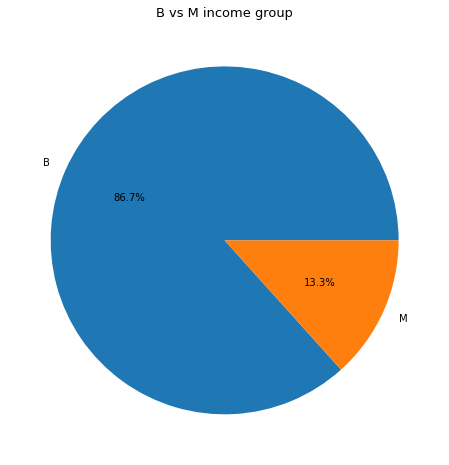

In [42]:
# Explore the target variable.

labels = data.income_groups.value_counts().index
sizes = data.income_groups.value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('B vs M income group',color = 'black',fontsize = 13);

In [43]:
# The target variable is imbalance, 87% vs 13%.
# However still acceptable. Not required to perform Undersampling (NearMiss)/Oversampling (SMOTE).

<a id = '1.1'></a>
### 3.3. EDA on Relationship Between Target Variable and Categorical Variables

In [44]:
data.describe(include='object').T

count unique              top  freq
race                    2039      4             Kree   905
gender                  2039      2                F  1041
employment              2039      6         Employed   941
education               2039      4      High School  1287
married                 2039      3              Yes  1481
person_living_in_house  2039     10                4   380
salary                  2039     10     Less than 1K   760
house_type              2039     13   Parent's house   599
house_value             2039     10       Below 100K  1477
vehicle                 2039      5  Local brand car   829
transport_use           2039      3    Own transport  1550
income_groups           2039      2                B  1767

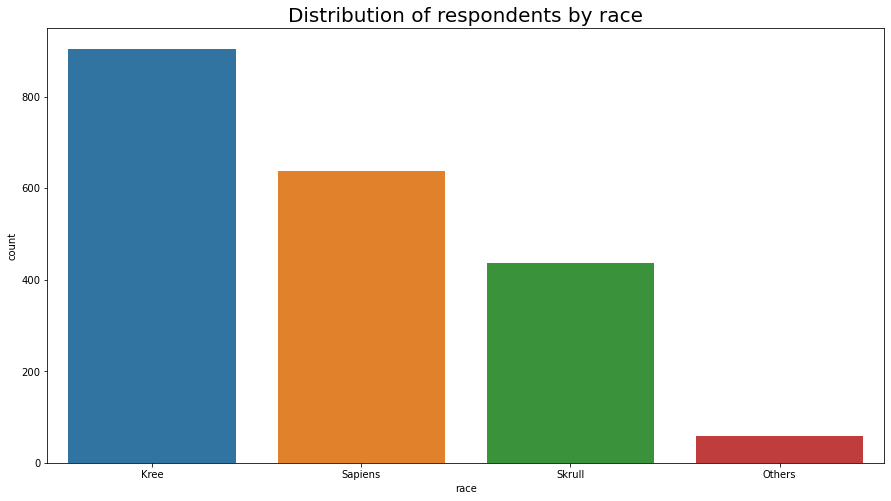

In [45]:
# Distribution of respondents by race
plt.figure(figsize=(15,8))
g=sns.countplot(x='race', data=data)
plt.xlabel('race')
plt.title('Distribution of respondents by race', fontsize=20)
plt.show()

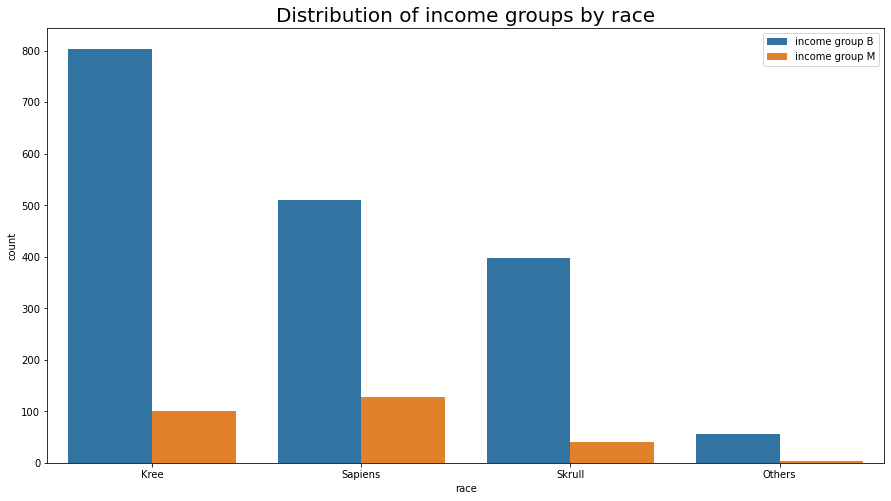

In [46]:
# Distribution of income groups by race.
plt.figure(figsize=(15,8))
g=sns.countplot(x='race', data=data, hue='income_groups')
plt.xlabel('race')
plt.legend(['income group B','income group M'], loc = 0)
plt.title('Distribution of income groups by race', fontsize=20)
plt.show()

In [47]:
# There are more Sapiens individual in M income group although more respondents from Kree in the survey.
# For better comparison, compare the cancel rate of each type of race

income_group_rate = data.groupby(["race","income_groups"]).size().reset_index(name='percentage(%)')
summe = income_group_rate.groupby("race")['percentage(%)'].transform("sum")
income_group_rate['percentage(%)'] = round(income_group_rate['percentage(%)'].div(summe)*100,1)
print(income_group_rate)

#plt.figure(figsize=(15,8))
#g=sns.barplot(data=income_group_rate, x='race', y='percentage(%)', hue='income_groups')
#plt.xlabel('race')
#plt.title('Percentage of income group by race', fontsize=20)
#plt.show()


      race income_groups  percentage(%)
0     Kree             B           88.8
1     Kree             M           11.2
2   Others             B           93.2
3   Others             M            6.8
4  Sapiens             B           80.1
5  Sapiens             M           19.9
6   Skrull             B           90.8
7   Skrull             M            9.2


In [48]:
#Sapiens people have significantly higher percentage coming from income group M with 20%.

In [49]:
# Distribution of type of house by income groups.
#!pip install plotly 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_house_type =  data['house_type'].value_counts().to_frame().reset_index()
data_house_type.rename(columns = {'index' : 'house_type', 'house_type' : 'count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_house_type['house_type'].values.tolist(), 
                     values = data_house_type['count'].values.tolist(), 
                     title = 'All respondents by type of house'), 1, 1)

B_house =  data[data['income_groups'] == 'B']['house_type'].value_counts().to_frame().reset_index()
B_house.rename(columns = {'index' : 'house_type', 'house_type' : 'count_B'}, inplace=True)
fig.add_trace(go.Pie(labels = B_house['house_type'].values.tolist(), 
                     values = B_house['count_B'].values.tolist(), 
                     title = 'All B income group by type of house'), 1, 2)

M_house =  data[data['income_groups'] == "M"]['house_type'].value_counts().to_frame().reset_index()
M_house.rename(columns = {'index' : 'house_type', 'house_type' : 'count_M'}, inplace=True)
fig.add_trace(go.Pie(labels = M_house['house_type'].values.tolist(), 
                    values = M_house['count_M'].values.tolist(), 
                    title = 'All M income group by type of house'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))

In [50]:
# 31%, 17% and 17% of of income group B are living at parent's house, own house(kampung) or own house(one storey terrace) respectively
# 28%, 18% and 17% of of income group M are living at own house(double storey terrace), parent's house, or own house(one storey terrace) respectively

In [51]:
# Distribution of type of gender by income groups.

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_gender =  data['gender'].value_counts().to_frame().reset_index()
data_gender.rename(columns = {'index' : 'gender', 'gender' : 'count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_gender['gender'].values.tolist(), 
                     values = data_gender['count'].values.tolist(), 
                     title = 'All respondents by gender'), 1, 1)

M_gender =  data[data['income_groups'] == 'B']['gender'].value_counts().to_frame().reset_index()
M_gender.rename(columns = {'index' : 'gender', 'gender' : 'count_B'}, inplace=True)
fig.add_trace(go.Pie(labels = M_gender['gender'].values.tolist(), 
                     values = M_gender['count_B'].values.tolist(), 
                     title = 'All B income group by gender'), 1, 2)

F_gender =  data[data['income_groups'] == "M"]['gender'].value_counts().to_frame().reset_index()
F_gender.rename(columns = {'index' : 'gender', 'gender' : 'count_M'}, inplace=True)
fig.add_trace(go.Pie(labels = F_gender['gender'].values.tolist(), 
                    values = F_gender['count_M'].values.tolist(), 
                    title = 'All M income group by gender'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))


In [52]:
income_group_rate = data.groupby(["gender","income_groups"]).size().reset_index(name='percentage(%)')
summe = income_group_rate.groupby("gender")['percentage(%)'].transform("sum")
income_group_rate['percentage(%)'] = round(income_group_rate['percentage(%)'].div(summe)*100,1)
print(income_group_rate)

  gender income_groups  percentage(%)
0      F             B           88.2
1      F             M           11.8
2      M             B           85.1
3      M             M           14.9


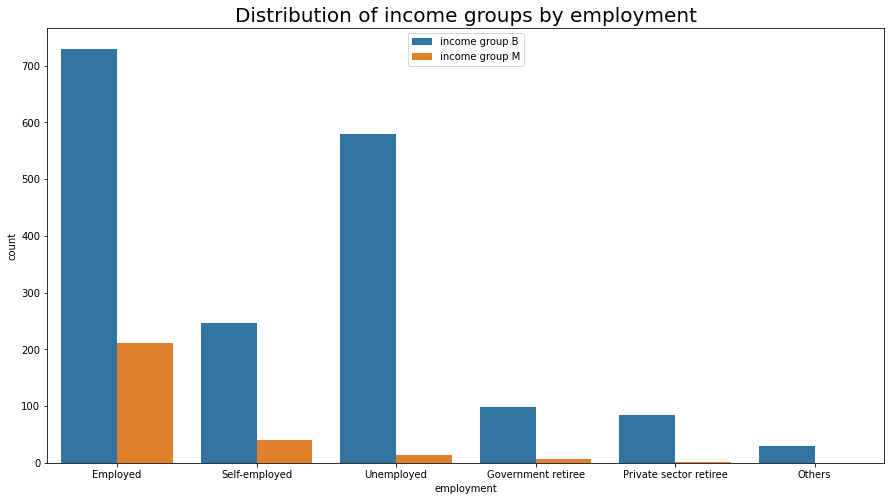

In [53]:
# Distribution of income groups by employment status.
plt.figure(figsize=(15,8))
g=sns.countplot(x='employment', data=data, hue='income_groups')
plt.xlabel('employment')
plt.legend(['income group B','income group M'], loc = 0)
plt.title('Distribution of income groups by employment', fontsize=20)
plt.show()

In [54]:
income_group_rate = data.groupby(["employment","income_groups"]).size().reset_index(name='percentage(%)')
summe = income_group_rate.groupby("employment")['percentage(%)'].transform("sum")
income_group_rate['percentage(%)'] = round(income_group_rate['percentage(%)'].div(summe)*100,1)
print(income_group_rate)

                employment income_groups  percentage(%)
0                 Employed             B           77.6
1                 Employed             M           22.4
2       Government retiree             B           94.3
3       Government retiree             M            5.7
4                   Others             B          100.0
5   Private sector retiree             B           98.8
6   Private sector retiree             M            1.2
7            Self-employed             B           85.7
8            Self-employed             M           14.3
9               Unemployed             B           97.8
10              Unemployed             M            2.2


In [55]:
# Distribution of employment status by income groups.

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_employment =  data['employment'].value_counts().to_frame().reset_index()
data_employment.rename(columns = {'index' : 'employment', 'employment' : 'count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_employment['employment'].values.tolist(), 
                     values = data_employment['count'].values.tolist(), 
                     title = 'All respondents by employment'), 1, 1)

M_employment =  data[data['income_groups'] == 'B']['employment'].value_counts().to_frame().reset_index()
M_employment.rename(columns = {'index' : 'employment', 'employment' : 'count_B'}, inplace=True)
fig.add_trace(go.Pie(labels = M_employment['employment'].values.tolist(), 
                     values = M_employment['count_B'].values.tolist(), 
                     title = 'All B income group by employment'), 1, 2)

F_employment =  data[data['income_groups'] == "M"]['employment'].value_counts().to_frame().reset_index()
F_employment.rename(columns = {'index' : 'employment', 'employment' : 'count_M'}, inplace=True)
fig.add_trace(go.Pie(labels = F_employment['employment'].values.tolist(), 
                    values = F_employment['count_M'].values.tolist(), 
                    title = 'All M income group by employment'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))


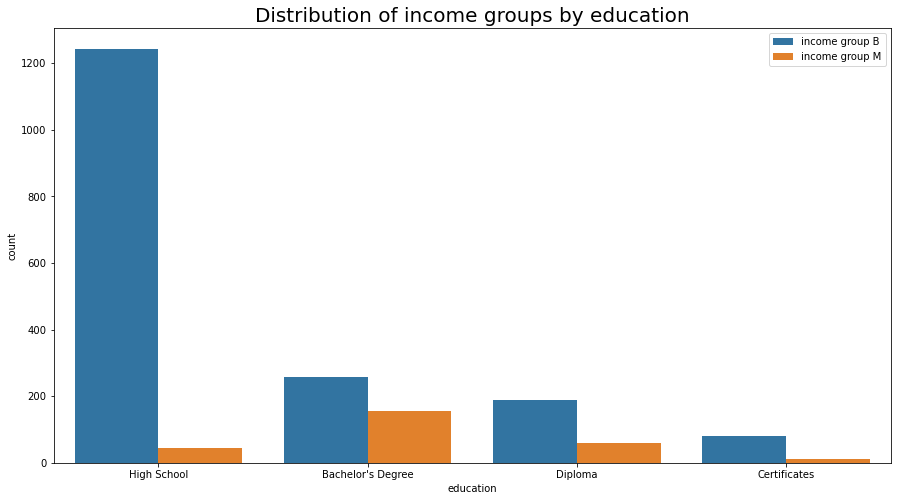

In [56]:
# Distribution of income groups by education levels.
plt.figure(figsize=(15,8))
g=sns.countplot(x='education', data=data, hue='income_groups')
plt.xlabel('education')
plt.legend(['income group B','income group M'], loc = 0)
plt.title('Distribution of income groups by education', fontsize=20)
plt.show()

In [57]:
income_group_rate = data.groupby(["education","income_groups"]).size().reset_index(name='percentage(%)')
summe = income_group_rate.groupby("education")['percentage(%)'].transform("sum")
income_group_rate['percentage(%)'] = round(income_group_rate['percentage(%)'].div(summe)*100,1)
print(income_group_rate)

           education income_groups  percentage(%)
0  Bachelor's Degree             B           62.2
1  Bachelor's Degree             M           37.8
2       Certificates             B           87.0
3       Certificates             M           13.0
4            Diploma             B           75.7
5            Diploma             M           24.3
6        High School             B           96.6
7        High School             M            3.4


In [58]:
# The income group of respondents is highly correlated with the education level. The higher the education level, the higher the probability of invidual to grouped in M income group.

In [59]:
# Distribution of education levels by income groups.

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_education =  data['education'].value_counts().to_frame().reset_index()
data_education.rename(columns = {'index' : 'education', 'education' : 'count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_education['education'].values.tolist(), 
                     values = data_education['count'].values.tolist(), 
                     title = 'All respondents by education'), 1, 1)

M_education =  data[data['income_groups'] == 'B']['education'].value_counts().to_frame().reset_index()
M_education.rename(columns = {'index' : 'education', 'education' : 'count_B'}, inplace=True)
fig.add_trace(go.Pie(labels = M_education['education'].values.tolist(), 
                     values = M_education['count_B'].values.tolist(), 
                     title = 'All B income group by education'), 1, 2)

F_education =  data[data['income_groups'] == "M"]['education'].value_counts().to_frame().reset_index()
F_education.rename(columns = {'index' : 'education', 'education' : 'count_M'}, inplace=True)
fig.add_trace(go.Pie(labels = F_education['education'].values.tolist(), 
                    values = F_education['count_M'].values.tolist(), 
                    title = 'All M income group by education'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))


In [60]:
# 57% of M income group are having Bachelor's Degree. 80% of the income group M have at least a diploma

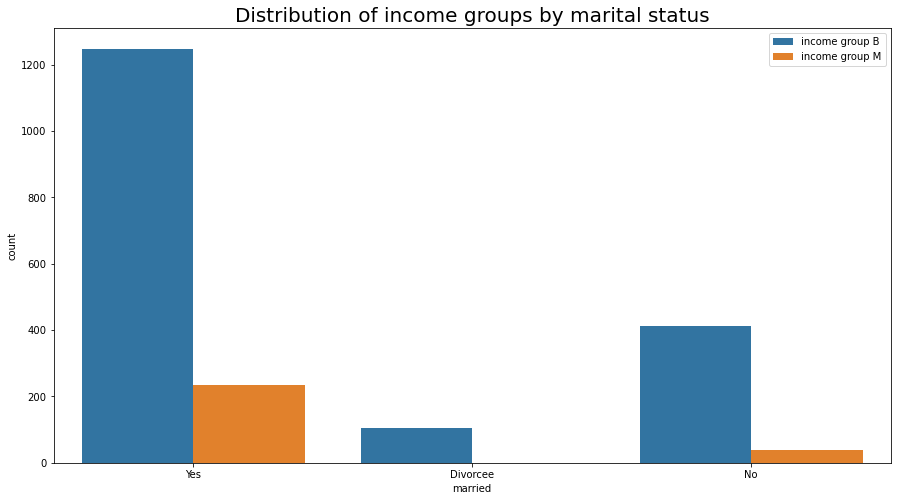

In [61]:
# Distribution of income groups by marital status.
plt.figure(figsize=(15,8))
g=sns.countplot(x='married', data=data, hue='income_groups')
plt.xlabel('married')
plt.legend(['income group B','income group M'], loc = 0)
plt.title('Distribution of income groups by marital status', fontsize=20)
plt.show()

In [62]:
income_group_rate = data.groupby(["married","income_groups"]).size().reset_index(name='percentage(%)')
summe = income_group_rate.groupby("married")['percentage(%)'].transform("sum")
income_group_rate['percentage(%)'] = round(income_group_rate['percentage(%)'].div(summe)*100,1)
print(income_group_rate)

    married income_groups  percentage(%)
0  Divorcee             B          100.0
1        No             B           91.4
2        No             M            8.6
3       Yes             B           84.3
4       Yes             M           15.7


In [63]:
# Distribution of marital status by income groups.

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_married =  data['married'].value_counts().to_frame().reset_index()
data_married.rename(columns = {'index' : 'married', 'married' : 'count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_married['married'].values.tolist(), 
                     values = data_married['count'].values.tolist(), 
                     title = 'All respondents by marital status'), 1, 1)

M_married =  data[data['income_groups'] == 'B']['married'].value_counts().to_frame().reset_index()
M_married.rename(columns = {'index' : 'married', 'married' : 'count_B'}, inplace=True)
fig.add_trace(go.Pie(labels = M_married['married'].values.tolist(), 
                     values = M_married['count_B'].values.tolist(), 
                     title = 'All B income group by marital status'), 1, 2)

F_married =  data[data['income_groups'] == "M"]['married'].value_counts().to_frame().reset_index()
F_married.rename(columns = {'index' : 'married', 'married' : 'count_M'}, inplace=True)
fig.add_trace(go.Pie(labels = F_married['married'].values.tolist(), 
                    values = F_married['count_M'].values.tolist(), 
                    title = 'All M income group by marital status'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))


In [64]:
# No significant insight/pattern between marital status and income group.

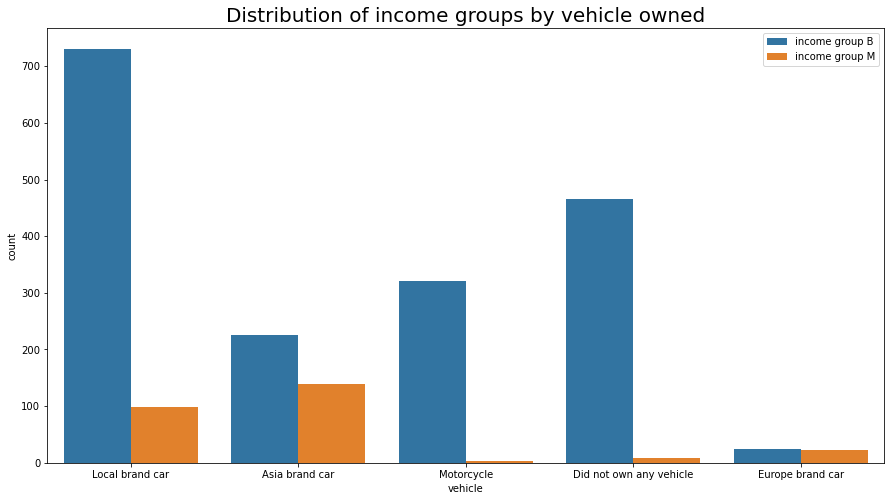

In [65]:
# Distribution of income groups by vehicle owned.
plt.figure(figsize=(15,8))
g=sns.countplot(x='vehicle', data=data, hue='income_groups')
plt.xlabel('vehicle')
plt.legend(['income group B','income group M'], loc = 0)
plt.title('Distribution of income groups by vehicle owned', fontsize=20)
plt.show()

In [66]:
income_group_rate = data.groupby(["vehicle","income_groups"]).size().reset_index(name='percentage(%)')
summe = income_group_rate.groupby("vehicle")['percentage(%)'].transform("sum")
income_group_rate['percentage(%)'] = round(income_group_rate['percentage(%)'].div(summe)*100,1)
print(income_group_rate)

                   vehicle income_groups  percentage(%)
0           Asia brand car             B           61.9
1           Asia brand car             M           38.1
2  Did not own any vehicle             B           98.1
3  Did not own any vehicle             M            1.9
4         Europe brand car             B           52.2
5         Europe brand car             M           47.8
6          Local brand car             B           88.2
7          Local brand car             M           11.8
8               Motorcycle             B           98.8
9               Motorcycle             M            1.2


In [67]:
# Distribution of vehicle owned by income groups.

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

data_vehicle =  data['vehicle'].value_counts().to_frame().reset_index()
data_vehicle.rename(columns = {'index' : 'vehicle', 'vehicle' : 'count'}, inplace=True)
fig.add_trace(go.Pie(labels = data_vehicle['vehicle'].values.tolist(), 
                     values = data_vehicle['count'].values.tolist(), 
                     title = 'All respondents by vehicle owned'), 1, 1)

M_vehicle =  data[data['income_groups'] == 'B']['vehicle'].value_counts().to_frame().reset_index()
M_vehicle.rename(columns = {'index' : 'vehicle', 'vehicle' : 'count_B'}, inplace=True)
fig.add_trace(go.Pie(labels = M_vehicle['vehicle'].values.tolist(), 
                     values = M_vehicle['count_B'].values.tolist(), 
                     title = 'All B income group by vehicle owned'), 1, 2)

F_vehicle =  data[data['income_groups'] == "M"]['vehicle'].value_counts().to_frame().reset_index()
F_vehicle.rename(columns = {'index' : 'vehicle', 'vehicle' : 'count_M'}, inplace=True)
fig.add_trace(go.Pie(labels = F_vehicle['vehicle'].values.tolist(), 
                    values = F_vehicle['count_M'].values.tolist(), 
                    title = 'All M income group by vehicle owned'), 1, 3)

fig.update_traces(textposition="inside", textinfo="label+percent+value",textfont_size=12,
                  marker=dict(line=dict(color='black', width=0.5)))


In [68]:
# The income group of respondents is highly correlated with the vehicle owned by the respondents. The more luxurious the type of vehicle owned, the higher the probability of invidual to grouped in M income group.

<a id = '1.2'></a>
### 3.4.  EDA on Relationship Between Target Variable and Numerical Variables

In [69]:
data.describe().T

count        mean           std   min    25%  \
age                        2039.0   47.937224     15.054464  24.0   34.0   
house_rental_fee           2039.0  115.256302    296.394161   0.0    0.0   
house_loan_pmt             2039.0  244.187151    757.887789   0.0    0.0   
transport_spending         2039.0  395.011476    864.191415   0.0    0.0   
public_transport_spending  2039.0   12.290780     81.133842   0.0    0.0   
house_utility              2039.0  258.037273    328.231907   0.0   70.0   
food_spending              2039.0  637.763610    625.487759   0.0  300.0   
kids_spending              2039.0  245.430211    786.667674   0.0    0.0   
personal_loan              2039.0   69.012261    350.286979   0.0    0.0   
education_loan             2039.0  486.723448  10176.482550   0.0    0.0   
other_loan                 2039.0   38.870034    251.144824   0.0    0.0   
investment                 2039.0   22.991663    670.159852   0.0    0.0   

                             50%    75%       max  
age                         49.0   60.0      88.0  
house_rental_fee             0.0    0.0    4000.0  
house_loan_pmt               0.0    0.0   10000.0  
transport_spending         200.0  500.0   30000.0  
public_transport_spending    0.0    0.0    2500.0  
house_utility              200.0  300.0    5000.0  
food_spending              500.0  900.0    6000.0  
kids_spending                0.0  300.0   20000.0  
personal_loan                0.0    0.0   10000.0  
education_loan               0.0    0.0  430000.0  
other_loan                   0.0    0.0    5000.0  
investment                   0.0    0.0   30000.0

In [70]:
NumCols = list(set(['age','house_rental_fee','house_loan_pmt','transport_spending',
                    'public_transport_spending','house_utility','food_spending',
                    'kids_spending','personal_loan','education_loan','other_loan','investment']))

----------------------------------------------------------------------------------------------
food_spending


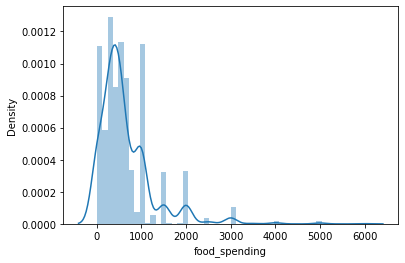

----------------------------------------------------------------------------------------------
house_rental_fee


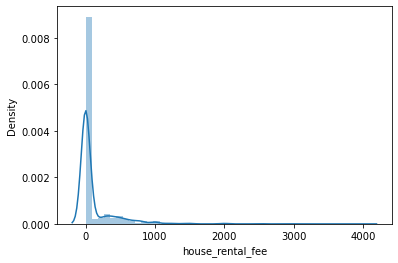

----------------------------------------------------------------------------------------------
age


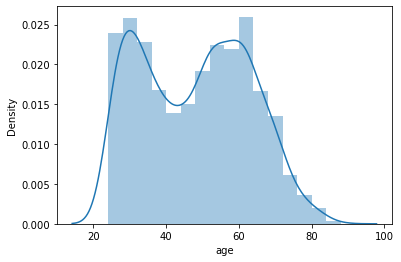

----------------------------------------------------------------------------------------------
house_loan_pmt


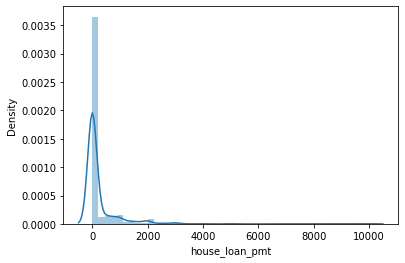

----------------------------------------------------------------------------------------------
other_loan


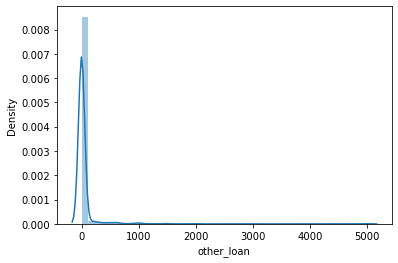

----------------------------------------------------------------------------------------------
house_utility


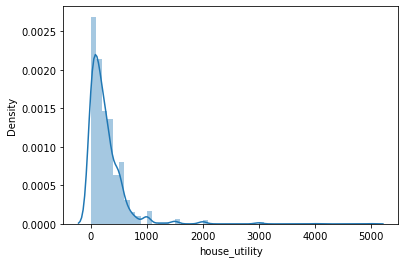

----------------------------------------------------------------------------------------------
transport_spending


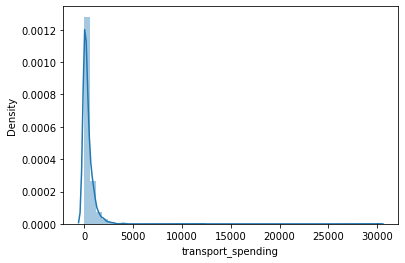

----------------------------------------------------------------------------------------------
kids_spending


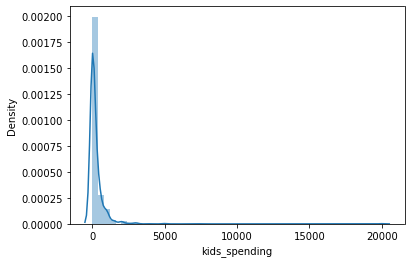

----------------------------------------------------------------------------------------------
public_transport_spending


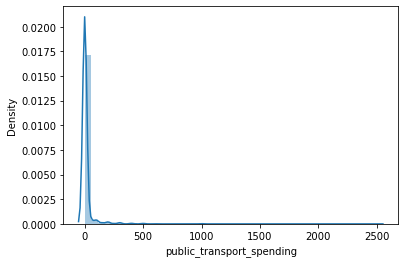

----------------------------------------------------------------------------------------------
investment


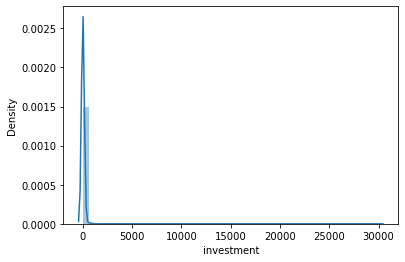

----------------------------------------------------------------------------------------------
education_loan


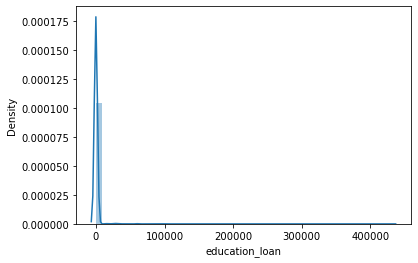

----------------------------------------------------------------------------------------------
personal_loan


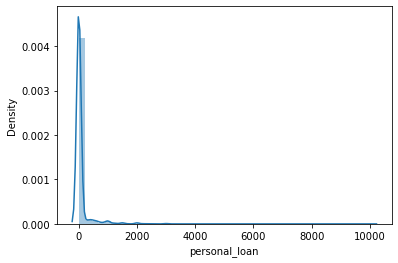

In [71]:

for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    sns.distplot(data[column])
    plt.show()

----------------------------------------------------------------------------------------------
food_spending


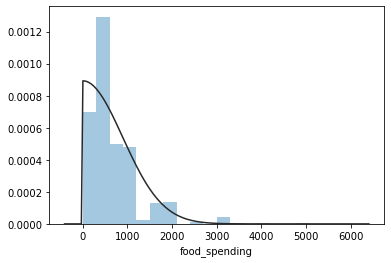

----------------------------------------------------------------------------------------------
house_rental_fee


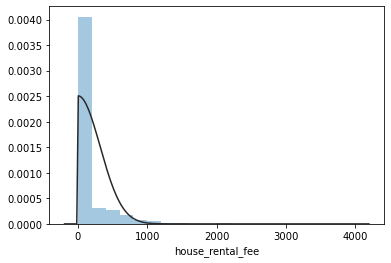

----------------------------------------------------------------------------------------------
age


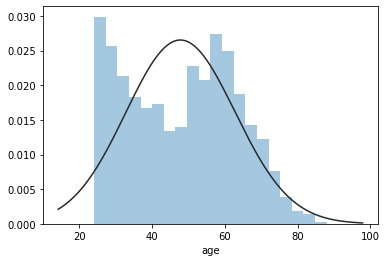

----------------------------------------------------------------------------------------------
house_loan_pmt


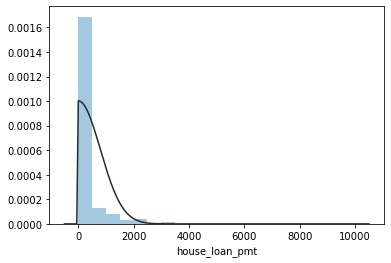

----------------------------------------------------------------------------------------------
other_loan


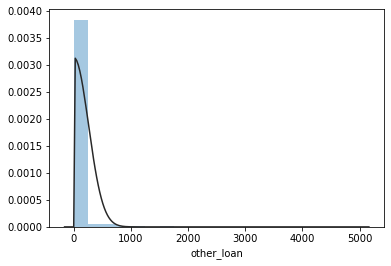

----------------------------------------------------------------------------------------------
house_utility


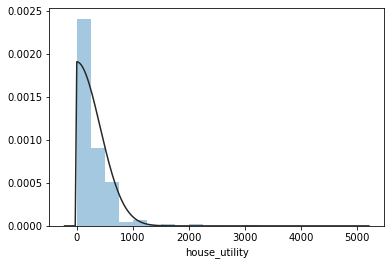

----------------------------------------------------------------------------------------------
transport_spending


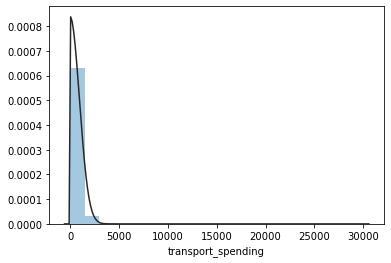

----------------------------------------------------------------------------------------------
kids_spending


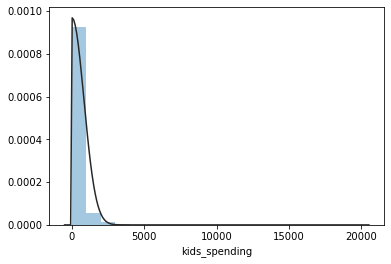

----------------------------------------------------------------------------------------------
public_transport_spending


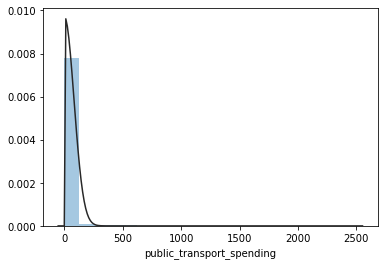

----------------------------------------------------------------------------------------------
investment


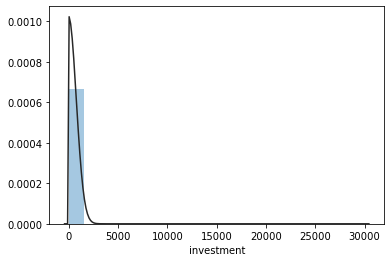

----------------------------------------------------------------------------------------------
education_loan


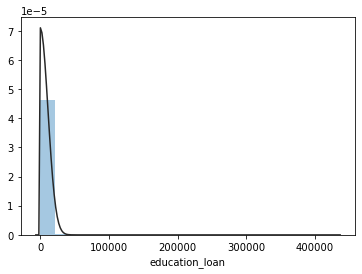

----------------------------------------------------------------------------------------------
personal_loan


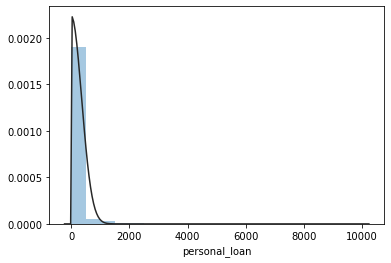

In [72]:
from scipy.stats import skewnorm

for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    sns.distplot(data[column], bins=20, fit=skewnorm, kde=False)
    plt.show()

----------------------------------------------------------------------------------------------
food_spending


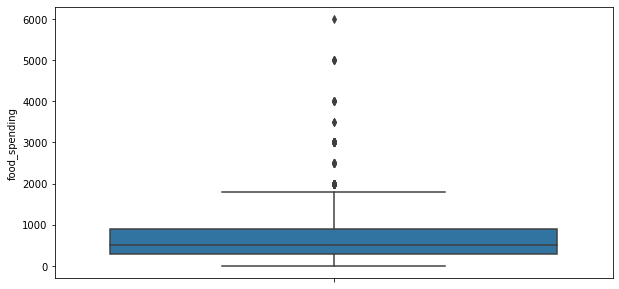

----------------------------------------------------------------------------------------------
house_rental_fee


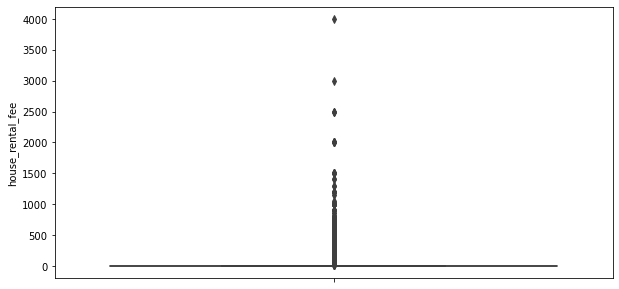

----------------------------------------------------------------------------------------------
age


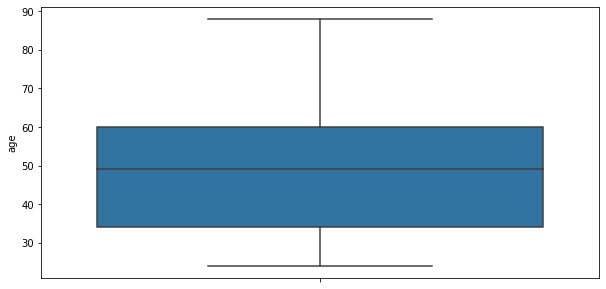

----------------------------------------------------------------------------------------------
house_loan_pmt


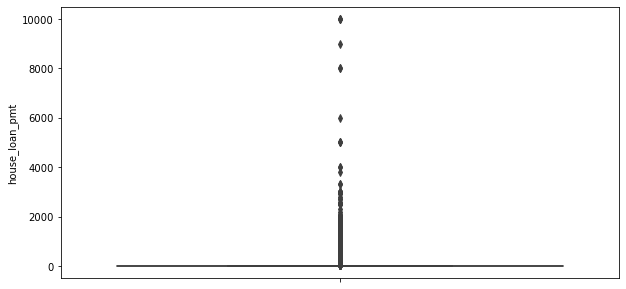

----------------------------------------------------------------------------------------------
other_loan


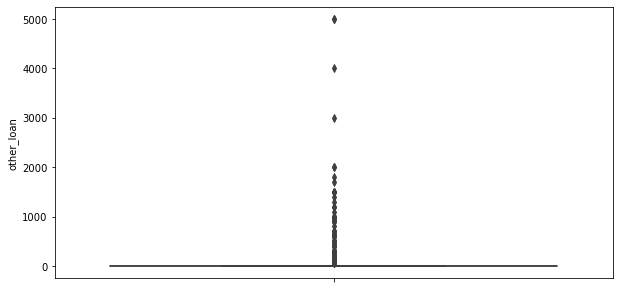

----------------------------------------------------------------------------------------------
house_utility


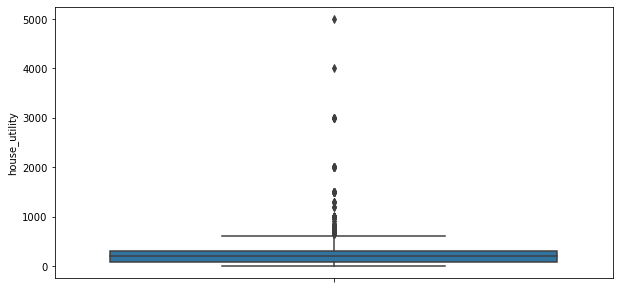

----------------------------------------------------------------------------------------------
transport_spending


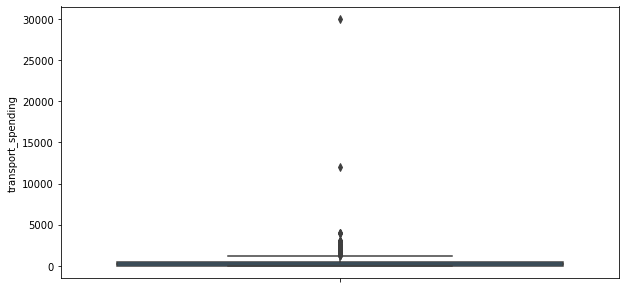

----------------------------------------------------------------------------------------------
kids_spending


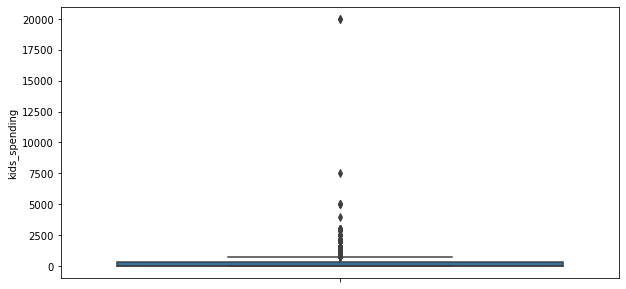

----------------------------------------------------------------------------------------------
public_transport_spending


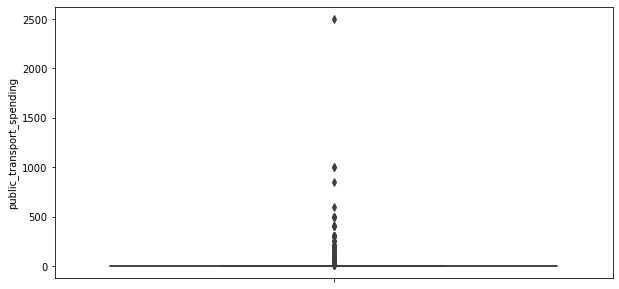

----------------------------------------------------------------------------------------------
investment


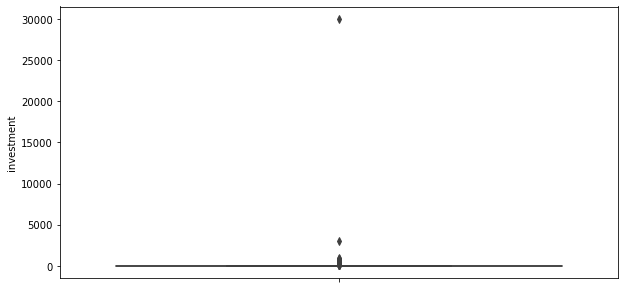

----------------------------------------------------------------------------------------------
education_loan


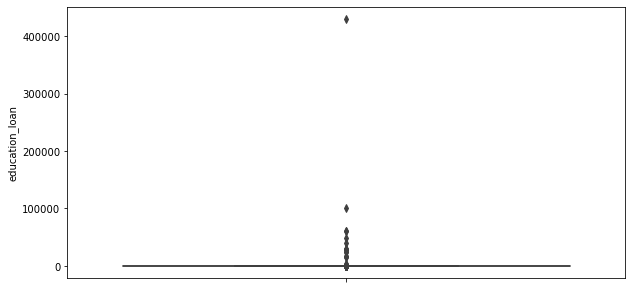

----------------------------------------------------------------------------------------------
personal_loan


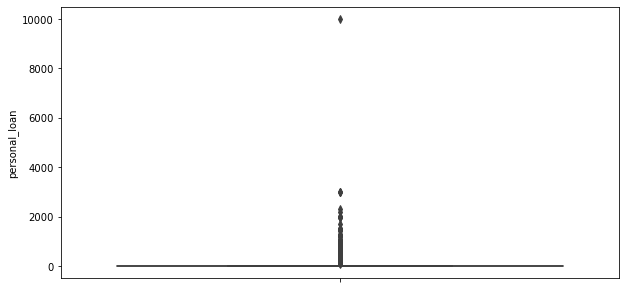

In [73]:
for column in NumCols:
    print('----------------------------------------------------------------------------------------------')
    print(column)
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data, y=column)
    plt.show()

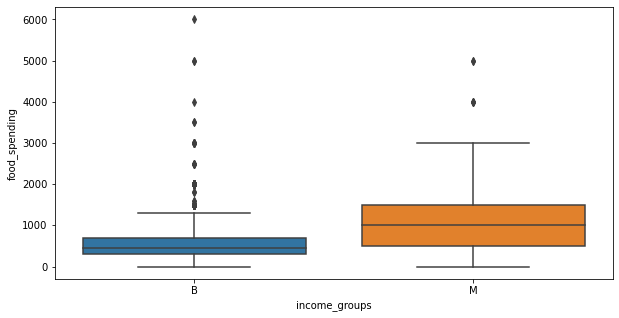

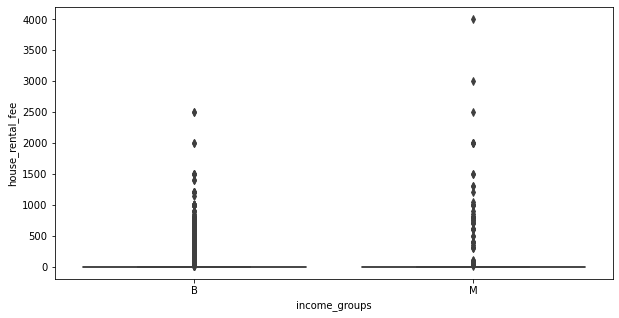

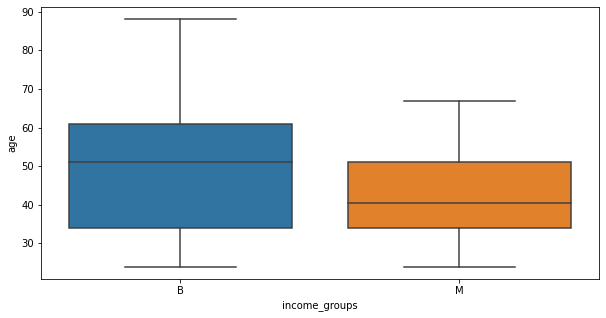

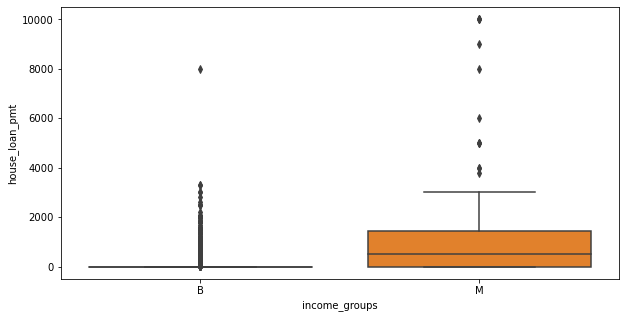

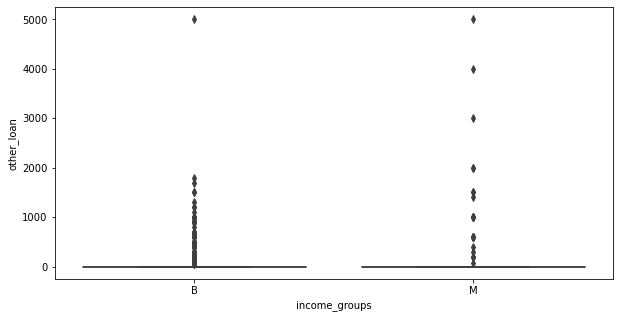

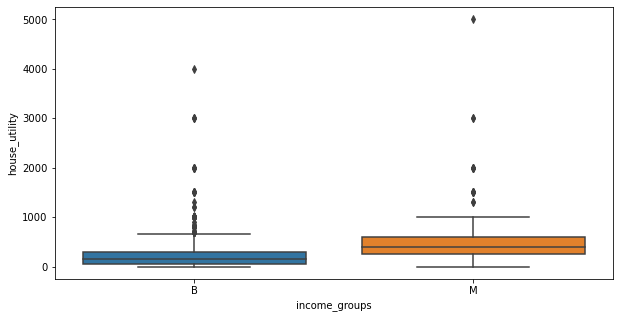

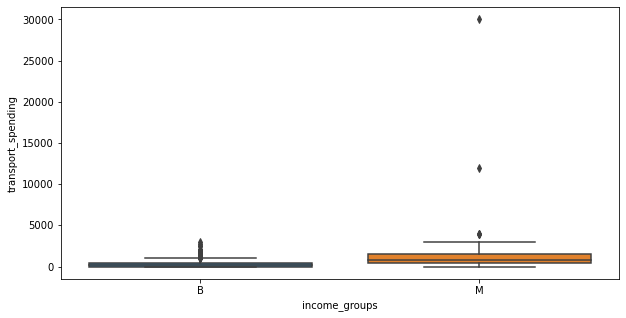

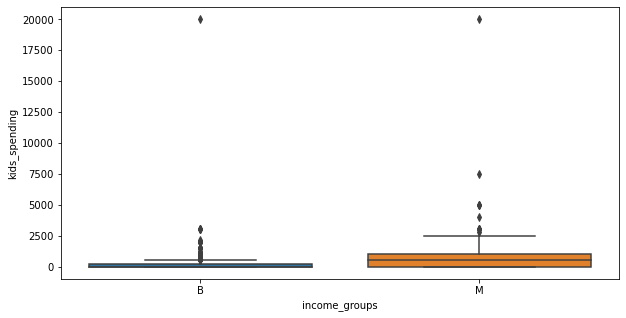

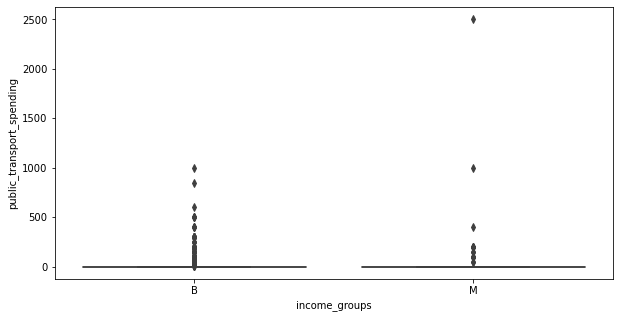

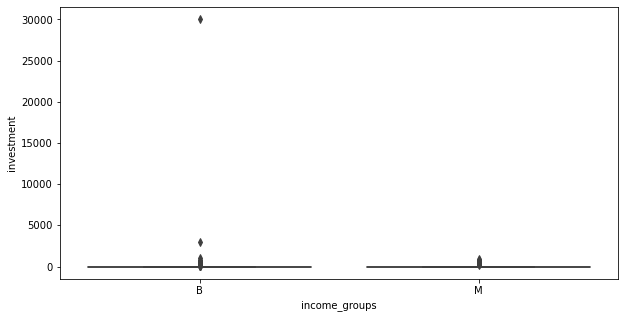

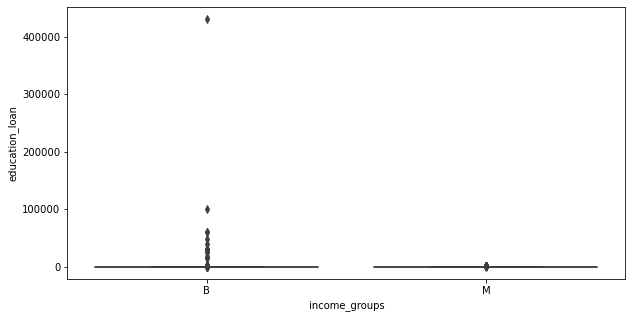

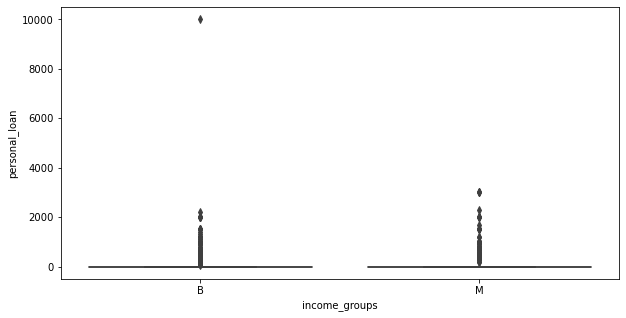

In [74]:
# Boxplot of each attributes across income groups
for column in NumCols:
    plt.figure(figsize=(10,5))  
    sns.boxplot(x=data.income_groups , y=data[column], data=data);

In [75]:
# From the box plot and distribution plot, we can see the data has many outliers and skews.
# This is because the attributes tend to 

<a id = '1.3'></a>
### 3.5.  Insight

* The target variable is imbalance, 87% vs 13%.
* However still acceptable. Not required to perform Undersampling (NearMiss)/Oversampling (SMOTE).

* There are more Sapiens individual in M income group although more respondents from Kree in the survey.
* Sapiens people have significantly higher percentage coming from income group M with 20%.

* 31%, 17% and 17% of of income group B are living at parent's house, own house(kampung) or own house(one storey terrace) respectively
* 28%, 18% and 17% of of income group M are living at own house(double storey terrace), parent's house, or own house(one storey terrace) respectively

* The income group of respondents is highly correlated with the education level. The higher the education level, the higher the probability of invidual to grouped in M income group.
* 57% of M income group are having Bachelor's Degree. 80% of the income group M have at least a diploma

* The income group of respondents is highly correlated with the vehicle owned by the respondents. The more luxurious the type of vehicle owned, the higher the probability of invidual to grouped in M income group.

* From the box plot and distribution plot, we can see the data has many outliers and skews.


# 4. Data Pre Processing

### 4.1. Transform categorical columns to numerical dummy data

In [76]:
#To transform categorical columns to numerical dummy data
columns = list(data.columns)

Cat_cols=[]
for i in columns:
    if data[i].dtype=='object':
        Cat_cols.append(i)
Cat_cols

['race',
 'gender',
 'employment',
 'education',
 'married',
 'person_living_in_house',
 'salary',
 'house_type',
 'house_value',
 'vehicle',
 'transport_use',
 'income_groups']

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Cat_cols:
    data[i]=le.fit_transform(data[i])
data.head().T

0       1      2      3      4
age                         30.0    43.0   28.0   57.0   51.0
race                         0.0     2.0    3.0    0.0    3.0
gender                       1.0     1.0    0.0    0.0    0.0
employment                   0.0     4.0    0.0    4.0    5.0
education                    3.0     0.0    0.0    3.0    3.0
married                      2.0     2.0    2.0    2.0    2.0
person_living_in_house       3.0     3.0    5.0    4.0    5.0
salary                       1.0     5.0    2.0    1.0    3.0
house_type                  10.0     1.0    6.0    4.0    3.0
house_value                  8.0     2.0    8.0    8.0    8.0
vehicle                      3.0     0.0    3.0    4.0    0.0
house_rental_fee           450.0     0.0    0.0    0.0    0.0
house_loan_pmt               0.0   950.0    0.0    0.0    0.0
transport_use                0.0     0.0    0.0    0.0    0.0
transport_spending         250.0   700.0  600.0  100.0    0.0
public_transport_spending    0.0     0.0    0.0    0.0    0.0
house_utility              120.0   350.0  300.0  200.0  180.0
food_spending              300.0  1000.0  600.0  800.0    0.0
kids_spending              160.0   500.0  100.0  450.0    0.0
personal_loan                0.0   300.0    0.0    0.0    0.0
education_loan               0.0     0.0    0.0    0.0    0.0
other_loan                 200.0     0.0    0.0    0.0    0.0
investment                   0.0     0.0    0.0    0.0    0.0
income_groups                0.0     1.0    0.0    0.0    0.0

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2225
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2039 non-null   int64  
 1   race                       2039 non-null   int32  
 2   gender                     2039 non-null   int32  
 3   employment                 2039 non-null   int32  
 4   education                  2039 non-null   int32  
 5   married                    2039 non-null   int32  
 6   person_living_in_house     2039 non-null   int32  
 7   salary                     2039 non-null   int32  
 8   house_type                 2039 non-null   int32  
 9   house_value                2039 non-null   int32  
 10  vehicle                    2039 non-null   int32  
 11  house_rental_fee           2039 non-null   float64
 12  house_loan_pmt             2039 non-null   float64
 13  transport_use              2039 non-null   int32

### 4.2. Correlation between Numerical Variables

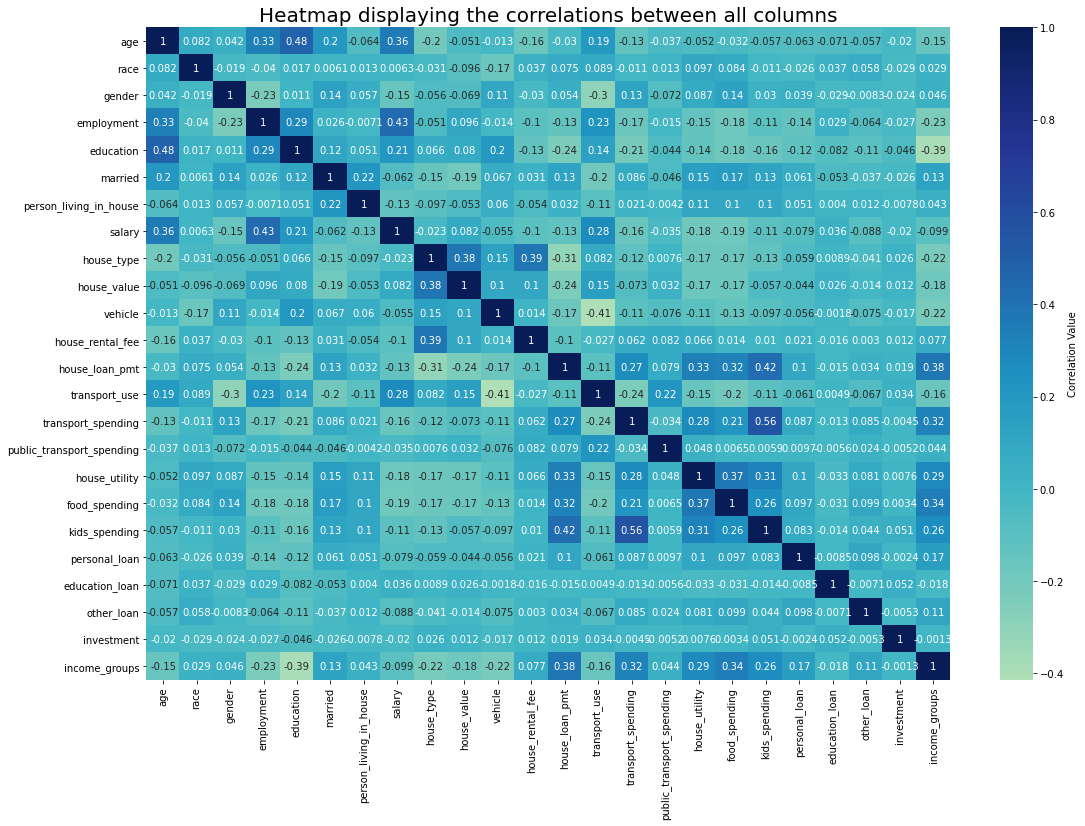

In [79]:
#Check Correlation between Numerical Variables

plt.figure(figsize=(18, 12))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(data.corr(),center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

In [80]:
corr = data.corr()['income_groups'].abs().sort_values(ascending = False)
corr

income_groups                1.000000
education                    0.393860
house_loan_pmt               0.379408
food_spending                0.339722
transport_spending           0.324608
house_utility                0.286350
kids_spending                0.262280
employment                   0.234381
vehicle                      0.223461
house_type                   0.223058
house_value                  0.177809
personal_loan                0.165022
transport_use                0.156306
age                          0.153334
married                      0.125715
other_loan                   0.113733
salary                       0.098963
house_rental_fee             0.076928
gender                       0.045788
public_transport_spending    0.043691
person_living_in_house       0.043458
race                         0.029229
education_loan               0.017735
investment                   0.001295
Name: income_groups, dtype: float64

### 4.3. Split data to train/test

In [81]:
# Separate X (features) and y (target)
# Exclude column 'salary' from ML model because it directly relates to the target variable 'income_groups'.

y = data['income_groups']
X = data.drop(['income_groups','salary'],axis=1)

X.shape, y.shape

((2039, 22), (2039,))

In [82]:
# Split data to train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size = 0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1733, 22), (306, 22), (1733,), (306,))

<a id = '4.0'></a>
# 5. Machine Learning Model to Predict The Income Group

### Logistics Regression

In [83]:
logr_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
logr_grid.fit(X_train, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

LogisticRegression Best parameters {'C': 10, 'fit_intercept': True, 'penalty': 'l1'}
LogisticRegression best score =  0.9193527995183624
Logistic Regression best model confusion matrix on test data  
 [[252   5]
 [ 24  25]]
*********************************************
Logistic Regression best model Precision  on test data = 0.83
Logistic Regression best model Recall on test data = 0.51
Logistic Regression best model F1 on test data  = 0.63
Logistic Regression best model Accuracy  on test data = 0.91
*********************************************


In [84]:
# Re-run the Log-Reg model with the best hyper-parameter for save and deployment.
lr = LogisticRegression(C=10, penalty='l1',solver='liblinear', fit_intercept=True)
lr.fit(X_train, y_train)

logr_pred = lr.predict(X_test)

print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

Logistic Regression best model confusion matrix on test data  
 [[252   5]
 [ 24  25]]
*********************************************
Logistic Regression best model Precision  on test data = 0.83
Logistic Regression best model Recall on test data = 0.51
Logistic Regression best model F1 on test data  = 0.63
Logistic Regression best model Accuracy  on test data = 0.91
*********************************************


### KNN Classifier

In [273]:
knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights':['uniform','distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train, y_train)
print('Knn best score = ',knn_grid.best_score_ )

knn_pred = knn_model.predict(X_test)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

Knn Best parameters {'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}
Knn best score =  0.8813546056592413
Knn best model confusion matrix on test data  
 [[254   3]
 [ 35  14]]
*********************************************
Knn best model Precision  on test data = 0.82
Knn best model Recall  on test data = 0.29
Knn best model F1 on test data = 0.42
Knn best model Accuracy  on test data = 0.88
*********************************************


### Decision Tree Classifier

In [275]:
dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train, y_train)
print('DecisionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecisionTree best score = ',dt_grid.best_score_ )

dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

DecisionTree Best parameters {'max_depth': 5}
DecisionTree best score =  0.8413002541976052
Decision Tree best model confusion matrix on test data  
 [[250   7]
 [ 32  17]]
*********************************************
Decision Tree best model Precision  on test data = 0.71
Decision Tree best model Recall on test data = 0.35
Decision Tree best model F1 on test data  = 0.47
Decision Tree best model Accuracy  on test data = 0.87
*********************************************


### SVM Classifier

In [271]:
svc = SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print('SVC best model confusion matrix on test data  \n',confusion_matrix(y_test, svc_pred)  )
print('*********************************************')
print('SVC best model Precision  on test data = {:.2f}'.format(precision_score(y_test, svc_pred)))
print('SVC best model Recall on test data = {:.2f}'.format(recall_score(y_test, svc_pred)))
print('SVC best model F1 on test data  = {:.2f}'.format(f1_score(y_test, svc_pred)))
print('SVC best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, svc_pred)))
print('*********************************************')

SVC best model confusion matrix on test data  
 [[255   2]
 [ 38  11]]
*********************************************
SVC best model Precision  on test data = 0.85
SVC best model Recall on test data = 0.22
SVC best model F1 on test data  = 0.35
SVC best model Accuracy  on test data = 0.87
*********************************************


<a id = '4.1'></a>
# 6. CONCLUSION - The best ML model: 

#### **The best accuracy score on test data is 0.91 using Logistic Regression Classifier which is highest among all models**

<a id = '3.0'></a>
# 7. Save & Serialize ML algorithms To a File

In [85]:
import pickle
# save the model to disk
filename = 'model_object_pred_income_groups.sav'
pickle.dump(lr, open(filename, 'wb'))